# Spearman Heatmap
- Spearman Correlation
- Heatmap Visualization

> **Note:**  
> Use the DATASET TEMPLATES below to run the codes


In [5]:
# DATA_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
# OUTPUT_PREFIX = "PSEN1_Sun"

In [6]:
# DATA_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
# OUTPUT_PREFIX = "PSEN1_Petit"

In [ ]:
# DATA_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
# OUTPUT_PREFIX = "PSEN1_Pillai"

In [ ]:
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
# OUTPUT_PREFIX = "PSEN2_Pillai"

In [1]:
# DATA_FILE = "raw_data/APP_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
# OUTPUT_PREFIX = "APP_Pillai"

In [7]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Change the cell below to read the dataset you want

In [ ]:
# --- 2️⃣ User Inputs (EDIT THESE ONLY) ---
DATA_FILE = "raw_data/PSEN1_Sun.csv"
OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
OUTPUT_PREFIX = "PSEN1_Sun"

In [9]:
# --- 3️⃣ Load Dataset ---
df = pd.read_csv(DATA_FILE)
df  # display dataframe

,Variants,Mutation,AAO,Total Activity,SD of Total Activity,Ab42/Ab40 ratio,SD of ratio,Amount of Ab40,SD of Ab40,Amount of Ab42,...,DANN_rankscore,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding
0,PSEN1:p.Arg35Gln,R35Q,59.0,0.430,0.031,1.449,0.267,0.423,0.032,0.673,...,0.20751,0.361677,0.44935,N,-0.683929,0.16279,0.839981,-0.500256,0.21837,1.201499
1,PSEN1:p.Ala79Val,A79V,61.2,0.013,0.002,NaN,NaN,0.008,0.001,0.056,...,0.98171,0.928313,0.91201,D,0.837492,0.88323,9.558504,0.766865,0.87344,9.212799
2,PSEN1:p.Val82Leu,V82L,55.0,0.596,0.018,0.813,0.070,0.608,0.016,0.516,...,0.91046,0.943348,0.94891,D,0.899956,0.91712,11.048510,0.847559,0.92834,11.683780
3,PSEN1:p.Leu85Pro,L85P,26.0,0.020,0.001,NaN,NaN,0.011,0.001,0.177,...,0.98099,0.966048,0.98840,D,0.907138,0.92061,11.235850,0.825157,0.91439,10.910840
4,PSEN1:p.Val89Leu,V89L,48.6,0.188,0.009,2.526,0.235,0.162,0.006,0.417,...,0.91218,0.945304,0.95328,D,1.007236,0.95941,14.151250,0.930148,0.96740,15.105730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,PSEN1:p.Ala434Cys,A434C,30.3,0.184,0.007,13.448,0.882,0.107,0.002,1.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,PSEN1:p.Leu435Phe,L435F,47.0,0.007,0.001,NaN,NaN,0.003,0.001,0.065,...,0.97953,0.922273,0.89664,D,1.057316,0.97243,15.834650,0.987702,0.98366,18.107830
123,PSEN1:p.Pro436Ser,P436S,47.0,0.165,0.003,8.736,0.338,0.114,0.001,1.013,...,0.96902,0.918603,0.88750,D,1.060208,0.97309,15.939360,0.990907,0.98435,18.295640
124,PSEN1:p.Ile437Val,I437V,57.0,0.133,0.013,4.326,0.548,0.104,0.012,0.441,...,0.49628,0.867801,0.78692,D,-0.006376,0.41303,2.488545,0.099276,0.44238,2.731581


In [10]:
# --- 4️⃣ Helper Functions ---
def coerce_numeric(s: pd.Series) -> pd.Series:
    """Convert a Series to numeric, removing symbols like '%' and ','."""
    if s.dtype.kind in "biufc":
        return s.astype(float)
    cleaned = (
        s.astype(str)
         .str.replace(r'[%\s]', '', regex=True)
         .str.replace(',', '', regex=False)
         .replace({'nan': np.nan, 'None': np.nan})
    )
    return pd.to_numeric(cleaned, errors="coerce")

def pairwise_corr(x, y, method="spearman"):
    """Compute correlation safely; require n ≥ 3."""
    x_num, y_num = coerce_numeric(x), coerce_numeric(y)
    mask = np.isfinite(x_num.values) & np.isfinite(y_num.values)
    n = int(mask.sum())
    if n < 3:
        return np.nan, np.nan, n
    if method == "spearman":
        r, p = stats.spearmanr(x_num[mask], y_num[mask])
    else:
        r, p = stats.pearsonr(x_num[mask], y_num[mask])
    return float(r), float(p), n

In [11]:
# --- 5️⃣ Identify Predictors/Outcomes ---
predictors = [c for c in df.columns if c.endswith("_rankscore")]
outcomes = [c for c in OUTCOME_COLUMNS if c in df.columns]

if not predictors:
    raise ValueError("No predictor columns ending with '_rankscore' found.")
if not outcomes:
    raise ValueError("None of the specified outcome columns were found in the dataset.")

print(f"Using {len(predictors)} predictors and {len(outcomes)} outcomes.\n")

Using 37 predictors and 5 outcomes.



In [12]:
# --- 6️⃣ Compute Correlations ---
rows = []
for pred in predictors:
    for out in outcomes:
        rho, pval, n = pairwise_corr(df[pred], df[out])
        rows.append({"Predictor": pred, "Outcome": out, "rho": rho, "p_value": pval, "n": n})

corr_df = pd.DataFrame(rows)

In [13]:
# --- 7️⃣ Preserve Order ---
pred_order = CategoricalDtype(categories=predictors, ordered=True)
out_order = CategoricalDtype(categories=outcomes, ordered=True)

corr_df["Predictor"] = corr_df["Predictor"].astype(pred_order)
corr_df["Outcome"] = corr_df["Outcome"].astype(out_order)
corr_df = corr_df.sort_values(["Outcome", "Predictor"]).reset_index(drop=True)

In [14]:
# --- 8️⃣ Save Results ---
output_csv = f"processed_data/{OUTPUT_PREFIX}_correlations.csv"
corr_df.to_csv(output_csv, index=False)
print(f"Saved correlation table → {output_csv}")

Saved correlation table → processed_data/PSEN1_Sun_correlations.csv


In [15]:
# --- 9️⃣ Prepare Heatmap Matrix ---
rho_matrix = corr_df.pivot(index="Predictor", columns="Outcome", values="rho")

# Optionally reorder rows by mean absolute correlation
rho_matrix = rho_matrix.loc[rho_matrix.abs().mean(axis=1).sort_values(ascending=False).index]

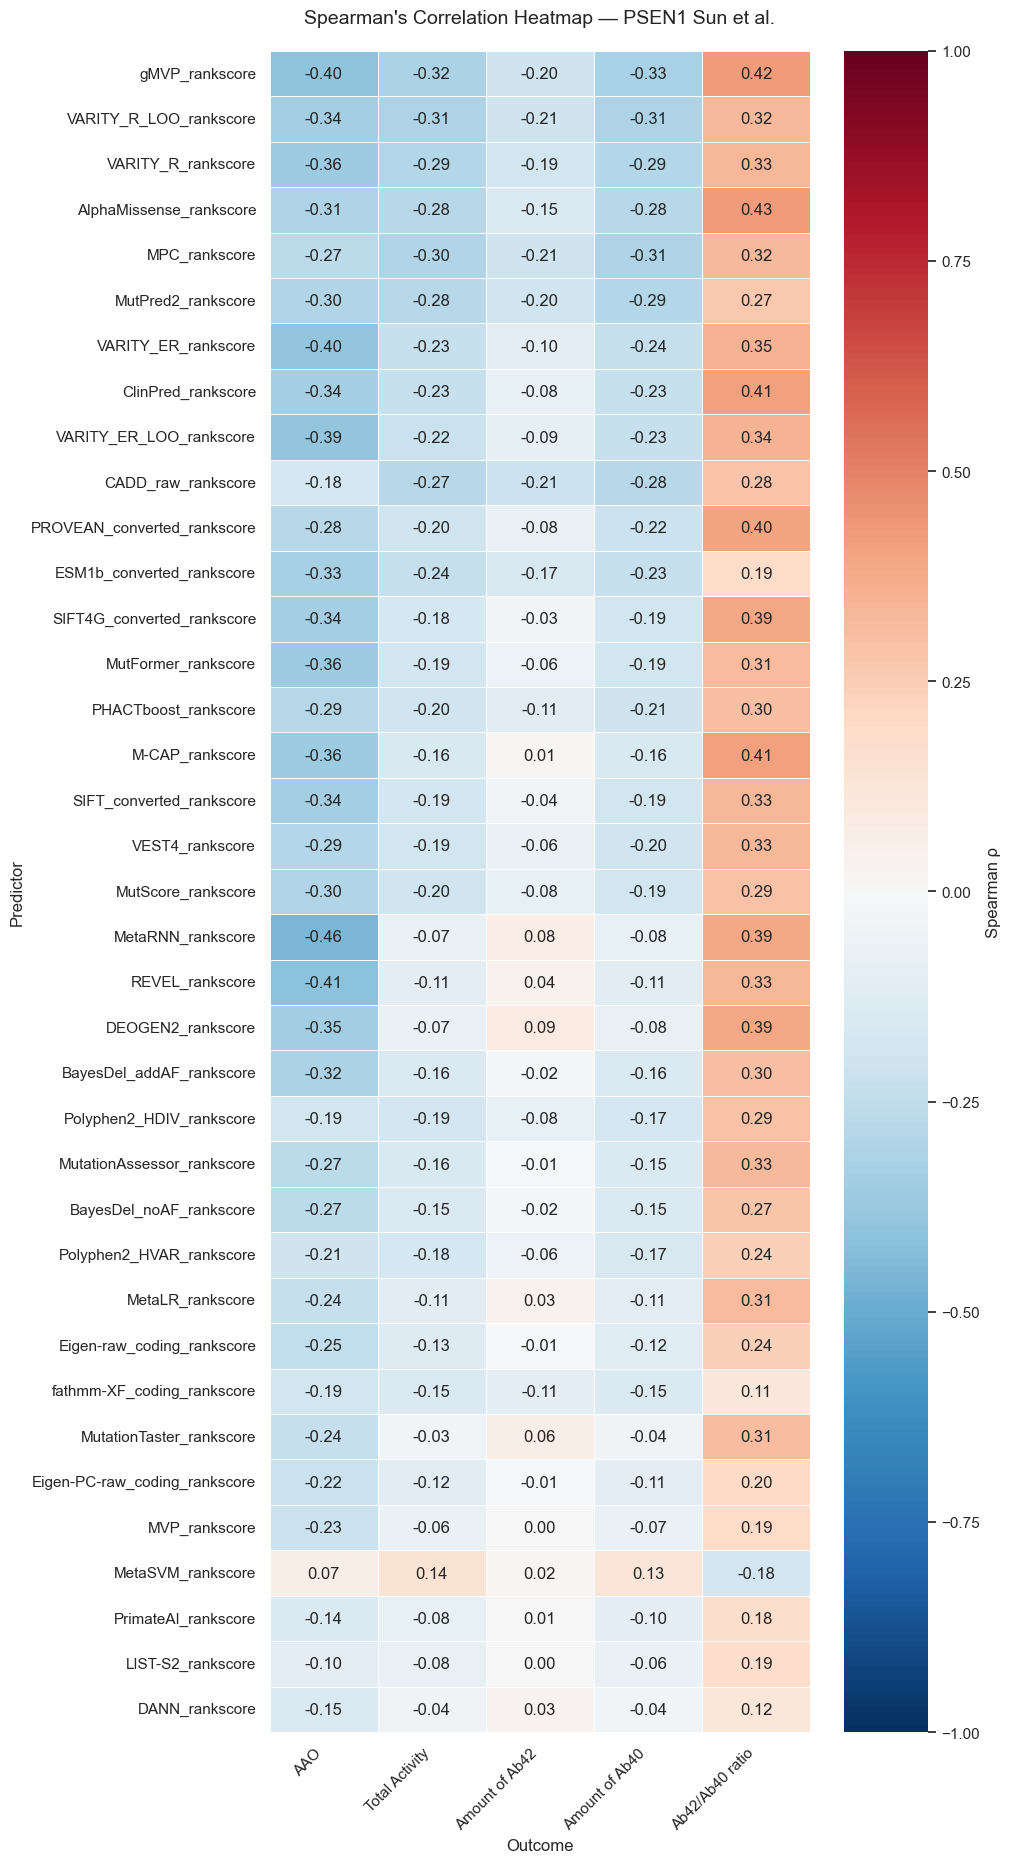

In [16]:
# --- 🔟 Plot Heatmap ---
sns.set(style="white", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 0.4 * len(predictors) + 4))

sns.heatmap(
    rho_matrix,
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax
)

ax.set_title(HEATMAP_TITLE, fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

In [17]:
# --- 1️⃣1️⃣ Save Heatmap ---
output_fig = f"figures/{OUTPUT_PREFIX}_heatmap.png"
fig.savefig(output_fig, dpi=600, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap → {output_fig}")

Saved heatmap → figures/PSEN1_Sun_heatmap.png
